# 北京房价影响因素分析

**导入包**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from numpy import corrcoef,array
#from IPython.display import HTML, display
from statsmodels.formula.api import ols

**引入数据源**

In [2]:
#读入清洗过后的数据
dat=pd.read_csv("sndHsPr.csv")  
dat.shape

(16210, 8)

**查看数据情况**

In [3]:
#价格单位转换成万元
dat.price=dat.price/10000  
#查看数据情况
dat.describe(include="all").T

count unique      top  freq      mean       std     min      25%  \
dist     16210      6  fengtai  2947       NaN       NaN     NaN      NaN   
roomnum  16210    NaN      NaN   NaN   2.16619  0.809907       1        2   
halls    16210    NaN      NaN   NaN   1.22141  0.532048       0        1   
AREA     16210    NaN      NaN   NaN   91.7466   44.0008   30.06       60   
floor    16210      3   middle  5580       NaN       NaN     NaN      NaN   
subway   16210    NaN      NaN   NaN  0.827822  0.377546       0        1   
school   16210    NaN      NaN   NaN  0.303085  0.459606       0        0   
price    16210    NaN      NaN   NaN   6.11518   2.22934  1.8348  4.28123   

            50%      75%      max  
dist        NaN      NaN      NaN  
roomnum       2        3        5  
halls         1        2        3  
AREA      78.83  110.517      299  
floor       NaN      NaN      NaN  
subway        1        1        1  
school        0        1        1  
price    5.7473  7.60998  14.9871

## 因变量分析

**price**

Text(0, 0.5, 'freq')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


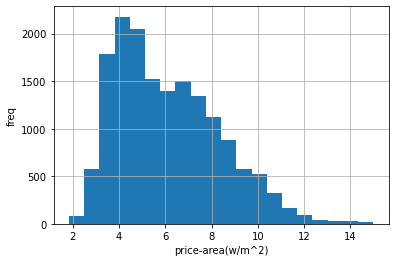

In [4]:
matplotlib.rcParams['axes.unicode_minus']=False#解决保存图像时负号'-'显示为方块的问题
plt.rcParams['font.sans-serif'] = ['SimHei']#指定默认字体 

#因变量直方图
dat.price.hist(bins=20)
#dat.price.plot(kind="hist",color='lightblue')
plt.xlabel("price-area(w/m^2)")
plt.ylabel("freq")


In [5]:
#查看price的均值、中位数和标准差等更多信息
print(dat.price.agg(['mean','median','std']))  
print(dat.price.quantile([0.25,0.5,0.75]))

mean      6.115181
median    5.747300
std       2.229336
Name: price, dtype: float64
0.25    4.281225
0.50    5.747300
0.75    7.609975
Name: price, dtype: float64


## 自变量

In [6]:
#整体来看
for i in range(7):
    if i != 3:
        print(dat.columns.values[i],":")
        print(dat[dat.columns.values[i]].agg(['value_counts']).T)
        print("=======================================================================")
    else:
        continue
print('AREA:')
print(dat.AREA.agg(['min','mean','median','max','std']).T)

dist :
              fengtai  haidian  chaoyang  dongcheng  xicheng  shijingshan
value_counts     2947     2919      2864       2783     2750         1947
roomnum :
                 2     3     1    4    5
value_counts  7971  4250  3212  675  102
halls :
                  1     2    0   3
value_counts  11082  4231  812  85
floor :
              middle  high   low
value_counts    5580  5552  5078
subway :
                  1     0
value_counts  13419  2791
school :
                  0     1
value_counts  11297  4913
AREA:
min        30.060000
mean       91.746598
median     78.830000
max       299.000000
std        44.000768
Name: AREA, dtype: float64


value_counts
fengtai              2947
haidian              2919
chaoyang             2864
dongcheng            2783
xicheng              2750
shijingshan          1947

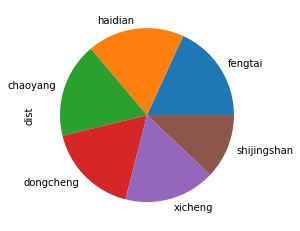

In [7]:
#频次统计
dat.dist.value_counts().plot(kind = 'pie')   #绘制柱柱形图
dat.dist.agg(['value_counts'])

**不同城区的单位房价面积均值情况**

<AxesSubplot:ylabel='dist'>

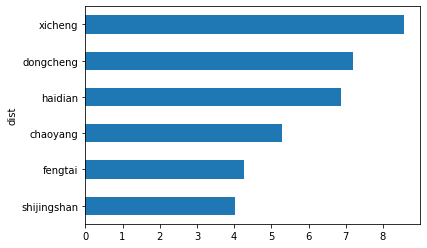

In [8]:

dat.price.groupby(dat.dist).mean().sort_values(ascending= True).plot(kind = 'barh')  

**城区对房价的分组箱线图**

/Users/gengbh/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 0, 'city')

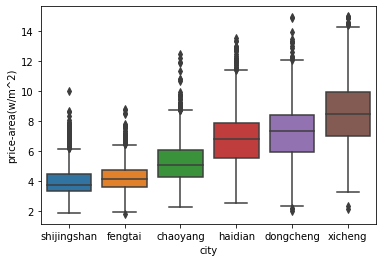

In [9]:
dat1=dat[['dist','price']]
dat1.dist=dat1.dist.astype("category")
dat1.dist.cat.set_categories(["shijingshan","fengtai","chaoyang","haidian","dongcheng","xicheng"],inplace=True)
#dat1.sort_values(by=['dist'],inplace=True)
sns.boxplot(x='dist',y='price',data=dat1)
#dat1.boxplot(by='dist',patch_artist=True)
plt.ylabel("price-area(w/m^2)")
plt.xlabel("city")
# plt.title("城区对房价的分组箱线图")

**不同卧室数的单位面积房价差异**

<AxesSubplot:title={'center':'price'}, xlabel='[roomnum]'>

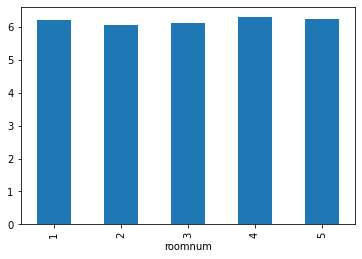

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


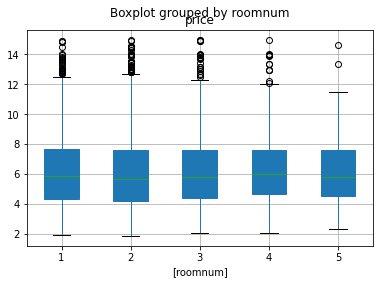

In [10]:
dat4=dat[['roomnum','price']]
dat4.price.groupby(dat4.roomnum).mean().plot(kind='bar')
dat4.boxplot(by='roomnum',patch_artist=True)

**厅数对单位面积房价影响**

<AxesSubplot:title={'center':'price'}, xlabel='[halls]'>

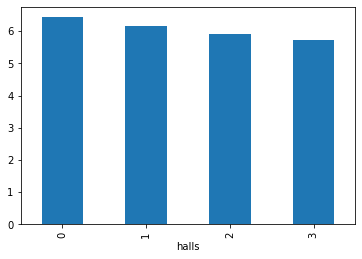

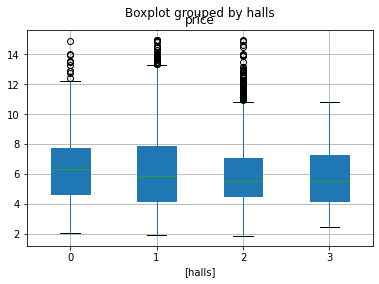

In [11]:
dat5=dat[['halls','price']]
dat5.price.groupby(dat5.halls).mean().plot(kind='bar')
dat5.boxplot(by='halls',patch_artist=True)

**不同楼层的单位面积房价影响**


/Users/gengbh/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:title={'center':'price'}, xlabel='[floor]'>

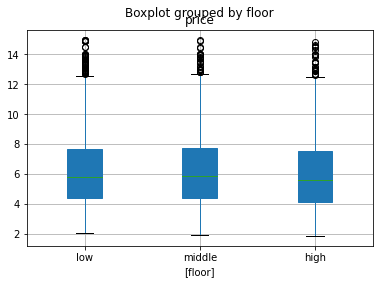

In [12]:
dat6=dat[['floor','price']]
dat6.floor=dat6.floor.astype("category")
dat6.floor.cat.set_categories(["low","middle","high"],inplace=True)
dat6.sort_values(by=['floor'],inplace=True)
dat6.boxplot(by='floor',patch_artist=True)

**学区影响**

In [13]:
print(pd.crosstab(dat.subway,dat.school))
sub_sch=pd.crosstab(dat.subway,dat.school)
sub_sch = sub_sch.div(sub_sch.sum(1),axis = 0)
sub_sch


school     0     1
subway            
0       2378   413
1       8919  4500


school         0         1
subway                    
0       0.852024  0.147976
1       0.664655  0.335345

In [14]:

def stack2dim(raw, i, j, rotation = 0, location = 'upper left'):
    '''
    此函数是为了画两个维度标准化的堆积柱状图
    要求是目标变量j是二分类的
    raw为pandas的DataFrame数据框
    i、j为两个分类变量的变量名称，要求带引号，比如"school"
    rotation：水平标签旋转角度，默认水平方向，如标签过长，可设置一定角度，比如设置rotation = 40
    location：分类标签的位置，如果被主体图形挡住，可更改为'upper left'
    
    '''
    import math
    data_raw = pd.crosstab(raw[i], raw[j])
    data = data_raw.div(data_raw.sum(1), axis=0)  # 交叉表转换成比率，为得到标准化堆积柱状图
    
    # 计算x坐标，及bar宽度
    createVar = locals()
    x = [0] #每个bar的中心x轴坐标
    width = [] #bar的宽度
    k = 0
    for n in range(len(data)):
        # 根据频数计算每一列bar的宽度
        createVar['width' + str(n)] = data_raw.sum(axis=1)[n] / sum(data_raw.sum(axis=1))
        width.append(createVar['width' + str(n)])  
        if n == 0:
            continue
        else:
            k += createVar['width' + str(n - 1)] / 2 + createVar['width' + str(n)] / 2 + 0.05
            x.append(k)  
    
    # 以下是通过频率交叉表矩阵生成一列对应堆积图每一块位置数据的数组，再把数组转化为矩阵
    y_mat = []
    n = 0
    for p in range(data.shape[0]):
        for q in range(data.shape[1]):
            n += 1
            y_mat.append(data.iloc[p, q])
            if n == data.shape[0] * 2:
                break
            elif n % 2 == 1:
                y_mat.extend([0] * (len(data) - 1))
            elif n % 2 == 0:
                y_mat.extend([0] * len(data))

    y_mat = np.array(y_mat).reshape(len(data) * 2, len(data))
    y_mat = pd.DataFrame(y_mat)  # bar图中的y变量矩阵，每一行是一个y变量
    
    # 通过x，y_mat中的每一行y，依次绘制每一块堆积图中的每一块图
    createVar = locals()
    for row in range(len(y_mat)):
        createVar['a' + str(row)] = y_mat.iloc[row, :]
        if row % 2 == 0:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], label='0', color='#5F9EA0')
            else:
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], color='#5F9EA0')
        elif row % 2 == 1:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], label='1', color='#8FBC8F')
            else:
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], color='#8FBC8F')

    plt.title(j + ' vs ' + i)
    group_labels = [data.index.name + ': ' + str(name) for name in data.index]
    plt.xticks(x, group_labels, rotation = rotation)
    plt.ylabel(j)
    plt.legend(shadow=True, loc=location)
    plt.show()


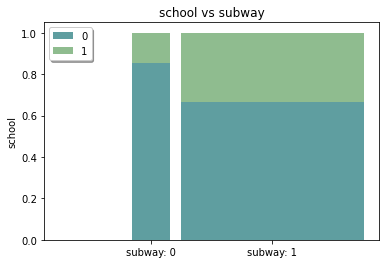

In [15]:
stack2dim(dat, i="subway", j="school")

**地铁、学区的分组箱线图**


<AxesSubplot:title={'center':'price'}, xlabel='[school]'>

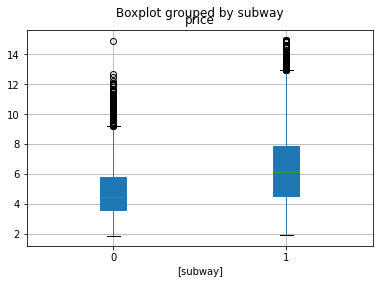

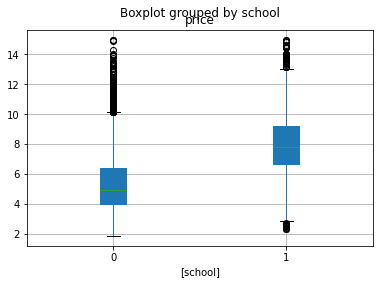

In [16]:
dat2=dat[['subway','price']]
dat3=dat[['school','price']]
dat2.boxplot(by='subway',patch_artist=True)
dat3.boxplot(by='school',patch_artist=True)

**面积**

array([[ 1.        , -0.07395475],
       [-0.07395475,  1.        ]])

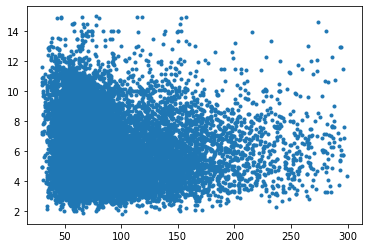

In [17]:
datA=dat[['AREA','price']]
plt.scatter(datA.AREA,datA.price,marker='.')
#求AREA和price的相关系数矩阵
data1=array(datA['price'])
data2=array(datA['AREA'])
datB=array([data1,data2])
corrcoef(datB)

**房屋面积和单位面积房价（取对数后）的散点图**


ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'area')

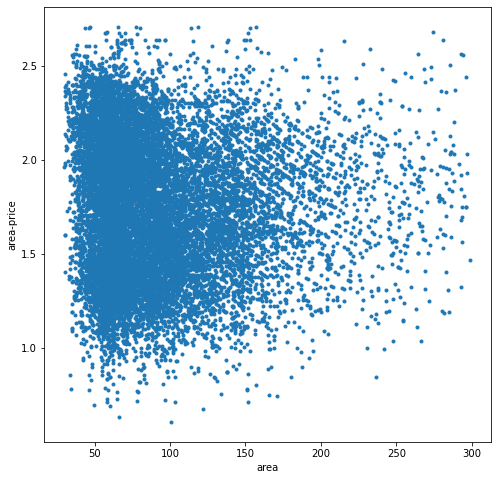

In [18]:
datA['price_ln'] = np.log(datA['price'])  #对price取对数
plt.figure(figsize=(8,8))
plt.scatter(datA.AREA,datA.price_ln,marker='.')
plt.ylabel("area-price")
plt.xlabel("area")

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'area(m^2)')

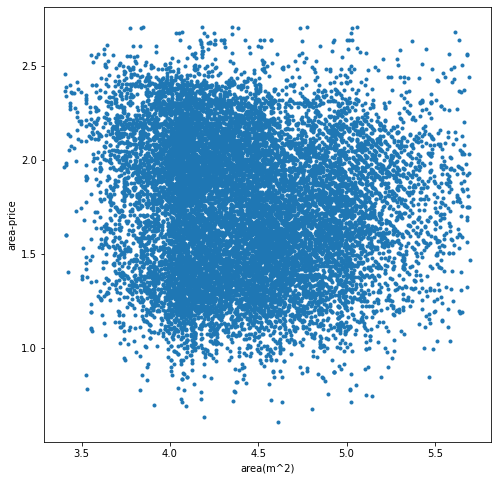

In [21]:
#房屋面积和单位面积房价（取对数后）的散点图
datA['price_ln'] = np.log(datA['price'])  #对price取对数
datA['AREA_ln'] = np.log(datA['AREA'])  #对price取对数
plt.figure(figsize=(8,8))
plt.scatter(datA.AREA_ln,datA.price_ln,marker='.')
plt.ylabel("area-price")
plt.xlabel("area(m^2)")

In [22]:
data1=array(datA['price_ln'])
data2=array(datA['AREA_ln'])
datB=array([data1,data2])
corrcoef(datB)

array([[ 1.       , -0.0939296],
       [-0.0939296,  1.       ]])